In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

#### Merge the 12 months of sales data into a single csv file

In [2]:
files = [file for file in os.listdir('/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
    
all_months_data.to_csv("all_data.csv", index=False)
    
    

#### Read in updated DataFrame

In [3]:
df = pd.read_csv(r"/home/abdulrahman/all_data.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Clean Up the Data

#### Drop NaN Values

In [6]:
# check if any null values exists
nan_df = df[df.isna().any(axis=1)]
nan_df

#df = df.dropna(how='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Find 'Or' or delete it

In [11]:
df = df[df['Order Date'].str[0:2] != 'Or']


#### Add additional columns

In [9]:
# Add month column
df['Month'] = df['Order Date'].str[0:2]
# Convert the 'Month' column to int datatype
df['Month'] = df['Month'].astype('int32')
df

/tmp/ipykernel_5660/2062372671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]
/tmp/ipykernel_5660/2062372671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### Convert the 'Price Each' column to float datatype & 'Quantity Ordered' column to int

In [14]:
df['Price Each'] = df['Price Each'].astype('float64')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

#### Add the Sales column

In [15]:
df['Sales'] = df['Price Each'] * df['Quantity Ordered']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


## Question 1: What was the best month for sales? How much was earned that month?

In [16]:
results =  df.groupby('Month').sum(numeric_only = True)

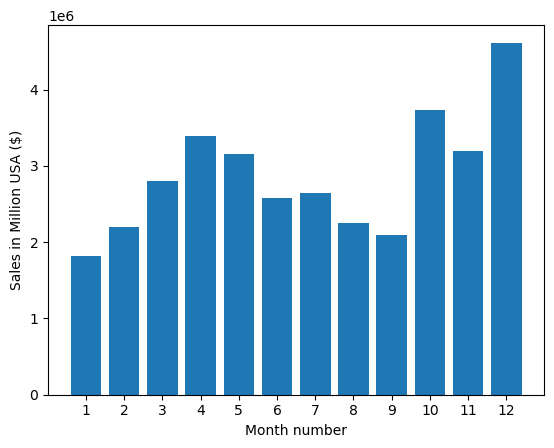

In [17]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Million USA ($)')
plt.xlabel('Month number')

plt.show()

## Question 2 : What city had the highest number of sales?

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


#### Split the 'Purchase Address' column

In [20]:
# a way to split the 'Purchase Address' column
# .apply() makes you to write a function and apply it to the Dataframe
df['Purchase Address'].apply(lambda x: x.split(',')[1])

0          New York City
1                 Austin
2            Los Angeles
3                Seattle
4                 Boston
               ...      
186845            Boston
186846     New York City
186847     San Francisco
186848     San Francisco
186849           Atlanta
Name: Purchase Address, Length: 185950, dtype: object

In [21]:
# Another way to split the 'Purchase Address' column
# using a defined function
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA)
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA)


In [22]:
city_result = df.groupby('City').sum(numeric_only=True)
city_result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


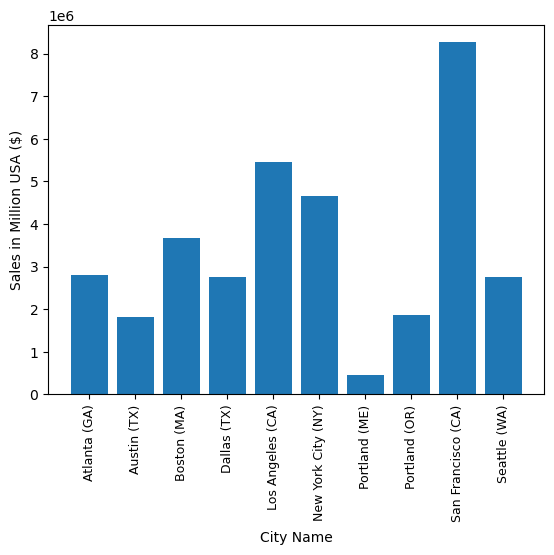

In [23]:
# Organize the cities order to match the order in the final sales result
cities = [city for city, all_data in df.groupby('City')] 

plt.bar(cities, city_result['Sales'])
plt.xticks(cities, rotation='vertical', size=9)
plt.ylabel('Sales in Million USA ($)')
plt.xlabel('City Name')

plt.show()

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

#### Convert the 'Order Date' column to datetime

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/tmp/ipykernel_5660/3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


#### Add 'Hour' & 'Minute' columns

In [25]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56


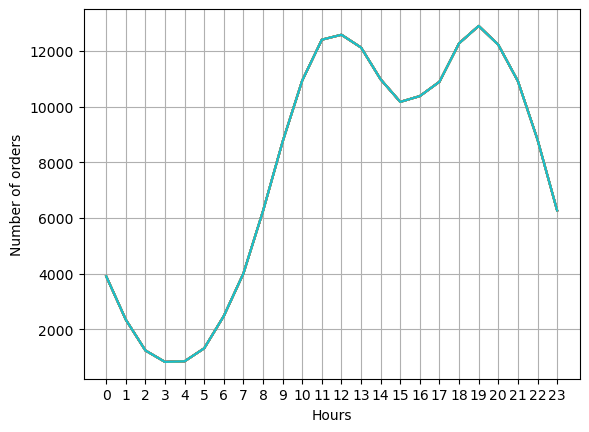

In [26]:
hours = [hour for hour, df in df.groupby('Hour')] 

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()
 
# My recommendation is around 11pm (11) or 7pm (19)

## Question 4: What products are most often sold together?

In [29]:
# Select only duplicated data
all_data = df[df['Order ID'].duplicated(keep=False)]

# Add products together that have the same order ID
all_data['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop all the data except the unique data in the 'Order ID' & 'Grouped' columns
all_data = all_data[['Order ID', 'Grouped']].drop_duplicates()

all_data.head()

,Order ID,Grouped
9,278806,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,"Wired Headphones,Apple Airpods Headphones"
24,278819,"iPhone,Apple Airpods Headphones"
39,278833,"iPhone,Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones,27in FHD Monitor"


#### Calculate the duplicates of the combination for 2 products

In [30]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in all_data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Quewstion 5: What product sold the most? Why do you think it sold the most?

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56


#### Calculate the most products sold, and display it in bar graph

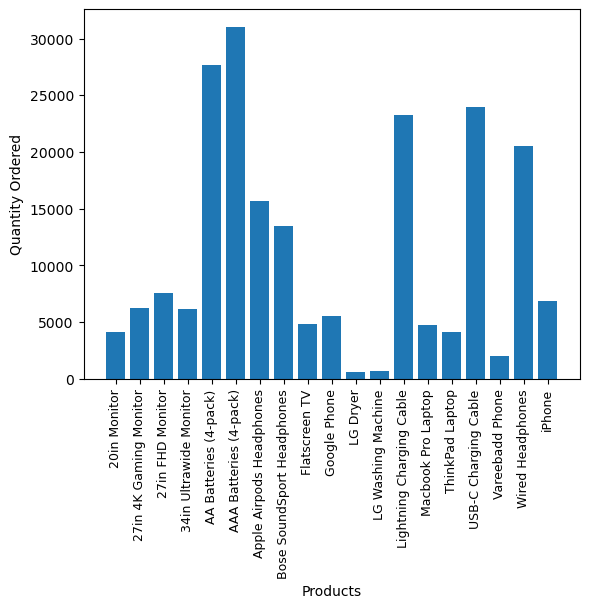

In [33]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

products = [product for product, all_data in product_group] 

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=9)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')

plt.show()

#### Set the price line in the same bar graph to see the relationship between the price and quantity sold

/tmp/ipykernel_5660/3936832269.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


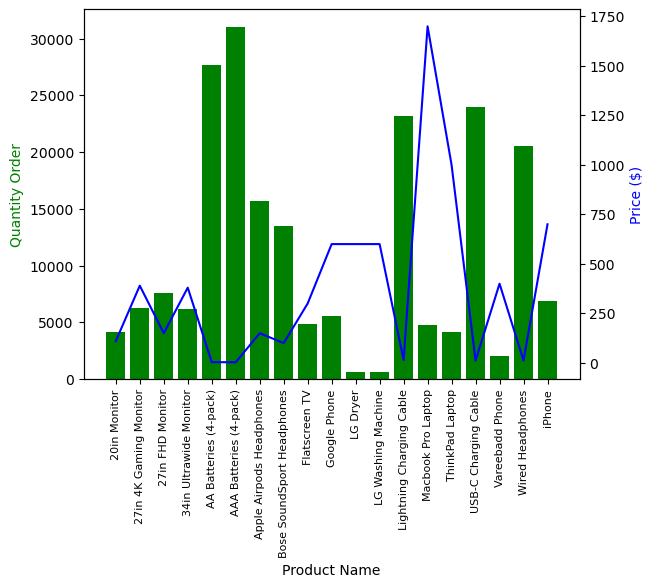

In [35]:
prices = df.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Order', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

#As you can see, the products that were sold the most have the lowest price, and the same is true for the opposite.